# ANALYSE DU CHAMPIONNAT NATIONAL 3 SAISON 2021/2022

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [51]:
data = pd.read_csv('games_national3.csv', index_col=0)

In [52]:
data

,Unnamed: 0,Equipe_Dom,Equipe_Ext,Score,Journee,Region
0,0,Bayonne,Lège-Cap-Ferret,1 - 0,1,Nouvelle Aquitaine
1,1,Bordeaux 2,Châtellerault,1 - 0,1,Nouvelle Aquitaine
2,2,Bressuire,Chauvigny,1 - 1,1,Nouvelle Aquitaine
3,3,Neuville,Tartas Sy,3 - 0,1,Nouvelle Aquitaine
4,4,Cognac,Libourne,1 - 4,1,Nouvelle Aquitaine
...,...,...,...,...,...,...
177,177,Bourgoin-Jailleu,Chambéry,0 - 4,26,Auvergne Rh Alpes
178,178,Haut lyonnais,Vaulx-en-Velin,4 - 2,26,Auvergne Rh Alpes
179,179,Lyon Duchère 2,Limonest,0 - 2,26,Auvergne Rh Alpes
180,180,Moulins,Montluçon,2 - 3,26,Auvergne Rh Alpes


## Nettoyage des données 

In [53]:
data.drop(columns={'Unnamed: 0'}, inplace=True)

Il est possible que certains matchs aient été arrétés et qu'il n'est donc pas de score final dans le format que nous attendons. Nous allons donc vérifier la colonne score et effectuer les modifications nécessaires dans le cas où le score n'est pas conforme à nos attentes

In [54]:
data['Score'].unique()

array(['1 - 0', '1 - 1', '3 - 0', '1 - 4', '2 - 3', '2 - 0', '2 - 1',
       '0 - 0', '6 - 1', '0 - 4', '5 - 1', '3 - 3', '3 - 2', '0 - 1',
       '1 - 2', '2 - 2', '0 - 3', '6 - 0', '0 - 2', '4 - 1', '1 - 3',
       '3 - 4', '3 - 1', '4 - 2', '5 - 2', '4 - 0', '2 - 5', '4 - 4',
       '0 - 5', '4 - 3', '2 - 4', '5 - 0', '7 - 0', '8 - 1', '1 - 5',
       '2 - 7', '3 - 0    (Forfait)', '6 - 2', '5 - 4', '7 - 1', '7 - 2',
       '1 - 6', '3 - 5', '9 - 0', '6 - 4', '0 - 6', '5 - 3', '8 - 4',
       '0 - 8', '1 - 7', '0 - 7', '10 - 2', '4 - 7', '2 - 6'],
      dtype=object)

Un match a eu comme résultat un forfait. Nous allons donc remplacer '3 - 0(Forfait)' simplement par '3-0'.

In [55]:
data['Score'] = data['Score'].apply(lambda x: x.replace('3 - 0    (Forfait)','3 - 0'))

Pour nos besoins, nous allons séparer le score en 2 autres colonnes, avec l'équipe ayant marqué à domcile et l'équipe ayant marqué à l'extérieur.

In [56]:
data['But_Dom'] = data['Score'].apply(lambda x: x.split('-')[0])
data['But_Ext'] = data['Score'].apply(lambda x: x.split('-')[-1])

data['But_Dom'] = data['But_Dom'].apply(lambda x: int(x.strip())) # Conversion en nombre des buts à domicile
data['But_Ext'] = data['But_Ext'].apply(lambda x: int(x.strip())) # Conversion en nombre des buts à l'extérieur
data['count'] = 1 # Création d'une colonne pour mettre en évidence qu'une ligne du dataset = un match 

data.head()

,Equipe_Dom,Equipe_Ext,Score,Journee,Region,But_Dom,But_Ext,count
0,Bayonne,Lège-Cap-Ferret,1 - 0,1,Nouvelle Aquitaine,1,0,1
1,Bordeaux 2,Châtellerault,1 - 0,1,Nouvelle Aquitaine,1,0,1
2,Bressuire,Chauvigny,1 - 1,1,Nouvelle Aquitaine,1,1,1
3,Neuville,Tartas Sy,3 - 0,1,Nouvelle Aquitaine,3,0,1
4,Cognac,Libourne,1 - 4,1,Nouvelle Aquitaine,1,4,1


## Enrichissement du dataset

In [57]:
# On renseigne du vainqueur du match par 1 et du perdant par 0. Dans le cas d'un match nul, on mettra la valeur 0.5

data['Hwin'] = np.where(data['But_Dom'] > data['But_Ext'], 1,np.where(data['But_Dom'] < data['But_Ext'],0,0.5))
data['Awin'] = np.where(data['But_Dom'] < data['But_Ext'], 1,np.where(data['But_Dom'] > data['But_Ext'],0,0.5))

data['count'] = 1
# On crée cette colonne pour spécifier que chaque ligne du dataset correspond à un match.
# Cela permettra de compter le nombre de matchs joués. 



In [58]:
# On crée également une colonne avec la différence de score en valeur absolue

data['abs_score_diff'] = abs(data['But_Dom'] - data['But_Ext'])

In [59]:
data.head()

,Equipe_Dom,Equipe_Ext,Score,Journee,Region,But_Dom,But_Ext,count,Hwin,Awin,abs_score_diff
0,Bayonne,Lège-Cap-Ferret,1 - 0,1,Nouvelle Aquitaine,1,0,1,1.0,0.0,1
1,Bordeaux 2,Châtellerault,1 - 0,1,Nouvelle Aquitaine,1,0,1,1.0,0.0,1
2,Bressuire,Chauvigny,1 - 1,1,Nouvelle Aquitaine,1,1,1,0.5,0.5,0
3,Neuville,Tartas Sy,3 - 0,1,Nouvelle Aquitaine,3,0,1,1.0,0.0,3
4,Cognac,Libourne,1 - 4,1,Nouvelle Aquitaine,1,4,1,0.0,1.0,3


In [60]:
data['sum_goals_games'] = data['But_Dom'] + data['But_Ext']

## Comparaison des différentes poules

On entend souvent que sur le territoire français, la région parisienne concentre le plus de talent, le plus d'équipes de qualité et donc que le niveau est plus élévé qu'ailleurs sur le territoire. Il serait donc intéressant de vérifier ces informations à travers une analyse comparative des différentes poules de N3.

In [61]:
data.groupby('Region')['count'].sum()

Region
Auvergne Rh Alpes     182
Bourg-Fr Comté        182
Bretagne              182
Centre                182
Corse-Medit           196
Grand est             182
Hauts de France       182
Normandie             182
Nouvelle Aquitaine    182
Occitanie             182
Paris IDF             182
Pays de la Loire      182
Name: count, dtype: int64

Toutes les équipes ont effectué le même nombre de matchs, à savoir 26 matchs par équipe car chaque poule comporte 14 équipes, excepté la poule Corse-Médit qui comprennd 15 équipes.

In [62]:
but_par_region = data.groupby('Region')['But_Dom','But_Ext'].sum().reset_index()
but_par_region['total_buts'] = but_par_region['But_Dom'] + but_par_region['But_Ext']
display(but_par_region)

/tmp/ipykernel_49/2486283276.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  but_par_region = data.groupby('Region')['But_Dom','But_Ext'].sum().reset_index()


,Region,But_Dom,But_Ext,total_buts
0,Auvergne Rh Alpes,315,243,558
1,Bourg-Fr Comté,304,216,520
2,Bretagne,346,281,627
3,Centre,282,271,553
4,Corse-Medit,342,247,589
5,Grand est,293,246,539
6,Hauts de France,286,197,483
7,Normandie,291,239,530
8,Nouvelle Aquitaine,319,241,560
9,Occitanie,272,234,506


In [63]:
but_par_region.sort_values(by = 'total_buts')

,Region,But_Dom,But_Ext,total_buts
10,Paris IDF,249,222,471
6,Hauts de France,286,197,483
9,Occitanie,272,234,506
1,Bourg-Fr Comté,304,216,520
7,Normandie,291,239,530
5,Grand est,293,246,539
11,Pays de la Loire,313,237,550
3,Centre,282,271,553
0,Auvergne Rh Alpes,315,243,558
8,Nouvelle Aquitaine,319,241,560


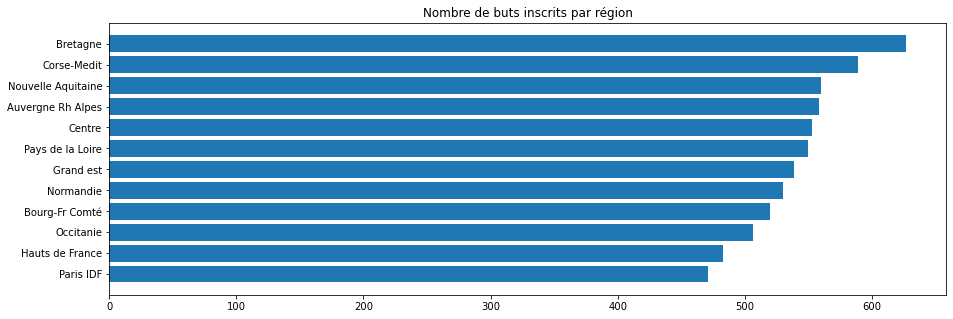

In [64]:
plt.figure(figsize=(15,5))
plt.barh(y = but_par_region.sort_values(by = 'total_buts')['Region'], width=but_par_region.sort_values(by = 'total_buts')['total_buts'])
plt.title('Nombre de buts inscrits par région')
plt.show()

Durant la saison 2021-2022, les régions Bretagne et Corse-Méditérranée ont été les pluss profiliques tandis que la région parisienne a inscrit le moins de buts avec un écart de plus de 150 buts entre la Bretagne et Paris-IDF.

**Comment peut-on expliquer une telle différence pour un nombre de matchs joués identique?**

Cette différence pourrait s'expliquer par une plus grosse concentration de talents dans la région Bretagne. Cepedant, nos données ne nous permettent pas de vérifier cette hypothèse. Une autre hypothèse serait de dire que la région Paris-IDF a un championnat plus équilibré, avec une meilleure homogénéïté au niveau des équipes. Ainsi l'écart entre les clubs seraient plus serrés que dans les autres poules.

In [65]:
ecart_match = data.groupby('Region')['abs_score_diff'].mean()

In [66]:
round(ecart_match,2).sort_values(ascending=True).reset_index().rename(columns = {'abs_score_diff':'écart_score'})

,Region,écart_score
0,Paris IDF,1.24
1,Hauts de France,1.35
2,Centre,1.39
3,Occitanie,1.45
4,Nouvelle Aquitaine,1.47
5,Normandie,1.48
6,Grand est,1.51
7,Auvergne Rh Alpes,1.52
8,Bourg-Fr Comté,1.57
9,Pays de la Loire,1.63


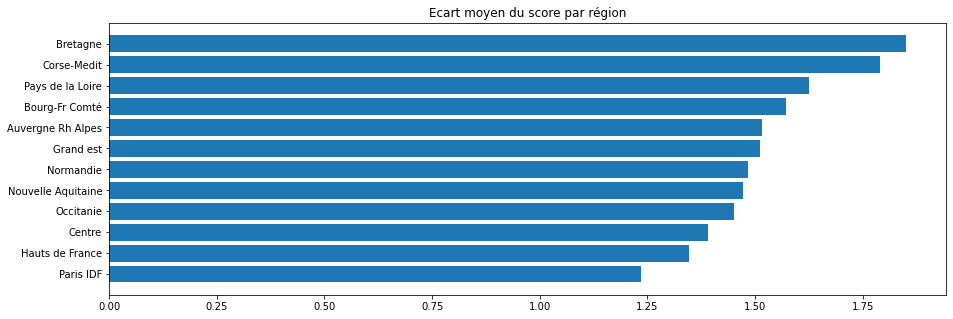

In [67]:
plt.figure(figsize=(15,5))
plt.barh(y = ecart_match.sort_values().index, width=ecart_match.sort_values().values)
plt.title('Ecart moyen du score par région')
plt.show()

Le graphique confirme notre seconde hypothèse: l'écart moyen de score en région parisienne est le plus faible en France, avec moins 1.25 buts de différence entre les équipes. Cela confirme bien que les scores sont plus serrés et donc que le niveau des équipes est plus proche. A contrario, l'écart moyen de score en Bretagne est proche de 2 buts, ce qui témoigne d'une plus grande différence de niveau entre les équipes.


In [68]:
scores_fleuves = data[data['abs_score_diff'] > 2].groupby('Region')['abs_score_diff'].count()

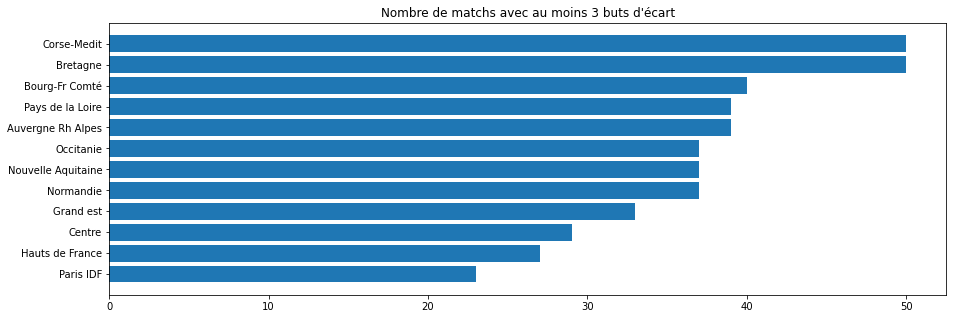

In [69]:
plt.figure(figsize=(15,5))
plt.barh(y = scores_fleuves.sort_values().index, width=scores_fleuves.sort_values().values)
plt.title("Nombre de matchs avec au moins 3 buts d'écart")
plt.show()

Le nombre de matchs où l'écart du score est d'au moins 3 buts est plus de 2 fois supérieur en Bretagne et en Corse-Méditérranée que pour la région IDF. Ces gros écarts de score représentent 28% des matchs en Bretagne contre seulement 12% des matchs en région parisienne. 

Un autre moyen de vérifier quelle région est la plus homogène est de regarder laquelle a produit le plus de match nul. 

In [70]:
matchs_nuls_region = data[data['abs_score_diff'] == 0].groupby('Region')['abs_score_diff'].count()

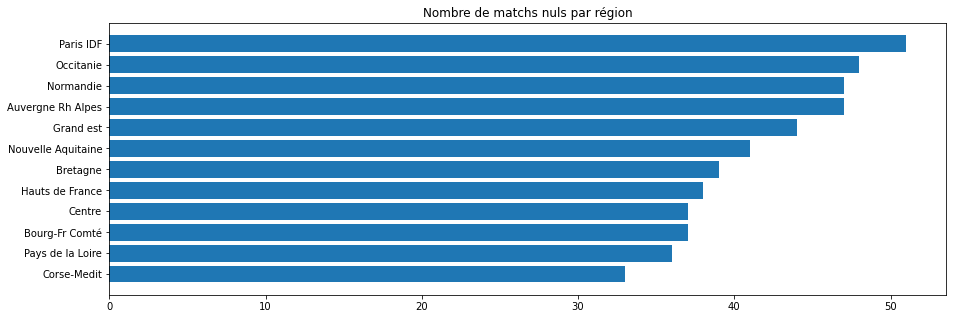

In [71]:
plt.figure(figsize=(15,5))
plt.barh(y = matchs_nuls_region.sort_values().index, width=matchs_nuls_region.sort_values().values)
plt.title('Nombre de matchs nuls par région')
plt.show()

Ce dernier graphique bien l'hypothèse précédente: La région Paris-IDF a produit le plus de matchs nuls durant la saison 2021-2022 avec plus de 50, ce qui représente presque 30% des matchs de la saison.

Regardons également si le fait de jouer à domicile a eu un impact sur les résultats selon la région. 

In [72]:
pourcentage_victoire_dom = data[data['Hwin'] == 1].groupby('Region')['Hwin'].count().values / np.array([182,182,182,182,196,182,
                                                                                  182,182,182,182,182,182])
round_pourc_vict = [round (x*100,1) for x in pourcentage_victoire_dom] 

In [73]:
pourcentage_victoire_ext = data[data['Hwin'] == 0].groupby('Region')['Awin'].count().values / np.array([182,182,182,182,196,182,
                                                                                  182,182,182,182,182,182])
round_pourc_vict_ext = [round (x*100,1) for x in pourcentage_victoire_ext] 

In [74]:
diff = pourcentage_victoire_dom - pourcentage_victoire_ext
diff_pourcentage = [ round (x*100,1) for x in diff] 

In [75]:
pd.DataFrame(data=
            {"Victoires à domicile":data[data['Hwin'] == 1].groupby('Region')['Hwin'].count(),
             "Victoires à l'extérieur":data[data['Awin'] == 1].groupby('Region')['Awin'].count(),
            "% victoire à domcile":round_pourc_vict,
            "% victoire à l'extérieur": round_pourc_vict_ext,
            "Différentiel": diff_pourcentage}).sort_values(by = 'Différentiel').reset_index()

,Region,Victoires à domicile,Victoires à l'extérieur,% victoire à domcile,% victoire à l'extérieur,Différentiel
0,Centre,74,71,40.7,39.0,1.6
1,Occitanie,72,62,39.6,34.1,5.5
2,Paris IDF,71,60,39.0,33.0,6.0
3,Grand est,77,61,42.3,33.5,8.8
4,Normandie,78,57,42.9,31.3,11.5
5,Auvergne Rh Alpes,79,56,43.4,30.8,12.6
6,Bretagne,83,60,45.6,33.0,12.6
7,Pays de la Loire,85,61,46.7,33.5,13.2
8,Nouvelle Aquitaine,83,58,45.6,31.9,13.7
9,Corse-Medit,96,67,49.0,34.2,14.8


Ici, on peut voir que la différence entre jouer à domicile et à l'extérieur varie énormément selon les régions. Jouer à domicile dans la région Centre n'offre globalement aucune garantie de s'imposer alors que pour la région Hauts de France, les équipes jouant à domicile ont tendance à s'imposer dans plus de la moitié des matchs. 

## Performance des équipes

A présent, il serait intéressant d'étudier les performances des équipes afin de savoir quelles équipes ont dominé sur le plan national.  

In [76]:
best_attack_dom = data.groupby('Equipe_Dom')['But_Dom', 'count'].sum().reset_index()
best_attack_ext = data.groupby('Equipe_Ext')['But_Ext', 'count'].sum().reset_index()

best_attack_dom.rename(columns = {'Equipe_Dom':'Equipe', 'count':'Matchs_Dom'}, inplace=True)
best_attack_ext.rename(columns = {'Equipe_Ext':'Equipe','count':'Matchs_Ext'}, inplace=True)

best_attack = pd.merge(best_attack_dom, best_attack_ext, on='Equipe')
best_attack['Total_buts_inscrits'] = best_attack['But_Dom'] + best_attack['But_Ext']
best_attack.rename(columns={'But_Dom':'Buts_marqués_Dom', 'But_Ext':'Buts_marqués_Ext'}, inplace=True)
# On crée un dataset qui réunit tous les buts inscrits à domicile et à l'extérieur


best_defense_dom = data.groupby('Equipe_Dom')['But_Ext' ].sum().reset_index()
best_defense_ext = data.groupby('Equipe_Ext')['But_Dom'].sum().reset_index()

best_defense_dom.rename(columns = {'Equipe_Dom':'Equipe'}, inplace=True)
best_defense_ext.rename(columns = {'Equipe_Ext':'Equipe'}, inplace=True)

best_defense = pd.merge(best_defense_dom, best_defense_ext, on='Equipe')
best_defense['Total_buts_encaissés'] = best_defense['But_Dom'] + best_defense['But_Ext']
best_defense.rename(columns={'But_Dom':'Buts_encaissés_Dom', 'But_Ext':'Buts_encaissés_Ext'}, inplace=True)
# On crée un dataset qui réunit tous les buts encaissés à domicile et à l'extérieur




/tmp/ipykernel_49/4037919972.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  best_attack_dom = data.groupby('Equipe_Dom')['But_Dom', 'count'].sum().reset_index()
/tmp/ipykernel_49/4037919972.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  best_attack_ext = data.groupby('Equipe_Ext')['But_Ext', 'count'].sum().reset_index()


In [77]:
teams_stats = pd.merge(best_attack, best_defense, on='Equipe')


In [78]:
teams_stats['Total_matchs'] = teams_stats['Matchs_Dom'] + teams_stats['Matchs_Ext']

In [79]:
# On détermine ici le nombre de victoires à domcile et à l'extérieur pour chaque équipe

dom_wins = data[data['Hwin'] == 1].groupby('Equipe_Dom')['Hwin'].sum().reset_index()
ext_wins = data[data['Awin'] == 1].groupby('Equipe_Ext')['Awin'].sum().reset_index()

dom_wins.rename(columns = {'Equipe_Dom':'Equipe', 'Hwin':'Dom_wins'}, inplace = True)
ext_wins.rename(columns = {'Equipe_Ext':'Equipe', 'Awin':'Ext_wins'}, inplace = True)


In [80]:
teams_stats = teams_stats.merge(dom_wins, on='Equipe')
teams_stats = teams_stats.merge(ext_wins, on='Equipe')

In [81]:
region_teams = data[['Equipe_Dom', 'Region']].drop_duplicates()
region_teams.rename(columns = {'Equipe_Dom':'Equipe'}, inplace=True)
teams_stats = teams_stats.merge(region_teams, on='Equipe')

In [82]:
# On supprime l'équipe Pontivy d'index 120 du dataset pour des raisons techniques

teams_stats.drop(index=120, inplace=True)

In [83]:
teams_stats['Total_wins'] = teams_stats['Dom_wins'] + teams_stats['Ext_wins']
teams_stats['% victoire'] = teams_stats['Total_wins'] / teams_stats['Total_matchs']

teams_stats['% victoire'] = teams_stats['% victoire'].apply(lambda x: round(100*x,2))


In [84]:
# Meilleure attaque de France
teams_stats.sort_values(by = 'Total_buts_inscrits', ascending=False)[['Equipe','Total_buts_inscrits','Region']][:10].reset_index().drop(columns = 'index')

,Equipe,Total_buts_inscrits,Region
0,Évreux,69,Normandie
1,La Roche-sur-Yon,64,Pays de la Loire
2,Brest (2),62,Bretagne
3,Colombes,62,Paris IDF
4,Stade Rennais 2,61,Bretagne
5,Thonon Evian,59,Auvergne Rh Alpes
6,Locminé,59,Bretagne
7,Furiani Agli.,58,Corse-Medit
8,Stade Bordelais,57,Nouvelle Aquitaine
9,Chambéry,57,Auvergne Rh Alpes


Il n'est pas surprenant de retrouver 3 équipes de Bretagne dans les 10 meilleures attaques de France. Par contre, l'équipe de Colombes se distingue ici car elle fait partie de la région qui inscrit le moins de buts mais se place en 3ème position des meilleures attaques de France. Colombes a inscrit quasiment 2 fois la moyenne de buts des équipes de sa poule, ce qui témoigne de sa supériorité sur la saison. 

In [85]:
# Meilleure défense de France

teams_stats.sort_values(by = 'Total_buts_encaissés', ascending=True)[['Equipe','Total_buts_encaissés','Region']][:10]

,Equipe,Total_buts_encaissés,Region
69,Gueugnon,16,Bourg-Fr Comté
31,Cannes,18,Corse-Medit
46,Colmar,20,Grand est
47,Colombes,20,Paris IDF
63,Feignies/Auln.,21,Hauts de France
66,Furiani Agli.,21,Corse-Medit
7,Alès,22,Occitanie
161,Wasquehal,23,Hauts de France
111,Oissel,23,Normandie
4,Ain Sud Foot,23,Auvergne Rh Alpes


In [86]:
# Meilleure équipe à domicile

teams_stats.sort_values(by = 'Dom_wins', ascending=False)[['Equipe','Dom_wins','Region']][:10]

,Equipe,Dom_wins,Region
31,Cannes,12.0,Corse-Medit
76,La Roche-sur-Yon,11.0,Pays de la Loire
46,Colmar,11.0,Grand est
66,Furiani Agli.,11.0,Corse-Medit
162,Évreux,11.0,Normandie
52,Dieppe,10.0,Normandie
34,Chambéry,10.0,Auvergne Rh Alpes
69,Gueugnon,10.0,Bourg-Fr Comté
143,Stade Bordelais,10.0,Nouvelle Aquitaine
136,Sochaux (2),10.0,Bourg-Fr Comté


In [87]:
# Meilleure équipe à l'extérieur

teams_stats.sort_values(by = 'Ext_wins', ascending=False)[['Equipe','Ext_wins','Region']][:10]

,Equipe,Ext_wins,Region
47,Colombes,11.0,Paris IDF
7,Alès,10.0,Occitanie
143,Stade Bordelais,9.0,Nouvelle Aquitaine
66,Furiani Agli.,9.0,Corse-Medit
159,Vierzon,9.0,Centre
149,Thonon Evian,9.0,Auvergne Rh Alpes
162,Évreux,8.0,Normandie
65,Fougères,8.0,Bretagne
114,Paris FC 2,8.0,Paris IDF
29,Brest (2),8.0,Bretagne


In [88]:
teams_stats.sort_values(by = '% victoire', ascending=False)[['Equipe','% victoire','Region']][:10]

,Equipe,% victoire,Region
66,Furiani Agli.,76.92,Corse-Medit
162,Évreux,73.08,Normandie
7,Alès,73.08,Occitanie
47,Colombes,73.08,Paris IDF
143,Stade Bordelais,73.08,Nouvelle Aquitaine
31,Cannes,69.23,Corse-Medit
46,Colmar,69.23,Grand est
134,Saumur,65.38,Pays de la Loire
123,Racing Besançon,65.38,Bourg-Fr Comté
149,Thonon Evian,65.38,Auvergne Rh Alpes


In [89]:
teams_stats.sort_values(by = 'Total_wins', ascending = False)[['Equipe','Total_wins','% victoire']][:10]

,Equipe,Total_wins,% victoire
66,Furiani Agli.,20.0,76.92
162,Évreux,19.0,73.08
143,Stade Bordelais,19.0,73.08
47,Colombes,19.0,73.08
7,Alès,19.0,73.08
31,Cannes,18.0,69.23
46,Colmar,18.0,69.23
149,Thonon Evian,17.0,65.38
134,Saumur,17.0,65.38
123,Racing Besançon,17.0,65.38


In [90]:
data.groupby('Journee')['sum_goals_games'].sum().sort_values(ascending = False)

Journee
26    321
25    299
22    286
23    267
24    265
16    264
19    258
12    253
7     253
9     252
13    246
4     244
10    242
5     242
21    241
8     238
15    235
3     234
11    233
2     231
6     231
20    229
14    228
1     216
18    215
17    199
28     34
27     30
Name: sum_goals_games, dtype: int64